In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition, preprocessing
from functions import *

## le nombre de composantes à calcule

In [8]:
n_comp = 6

## l'importation de l'échantillon

In [9]:
data = pd.read_csv('my_courses.csv', decimal='.',  index_col=0 )

## la selection des colonnes à prendre en compte dans l'ACP

In [6]:
data_pca = data[
    ["inscription","progression","moyenneDeClasse","duree","difficulte","nbChapitres","ratioQuizEvaluation","nbEvaluations"]
]

## la préparation des données pour l'ACP

In [18]:
# Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
data_pca = data_pca.fillna( data_pca.mean() )

In [19]:
X = data_pca.values
# ou data.index pour avoir les intitulés
features = data.columns
names = data["idCours"] 

In [21]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [22]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

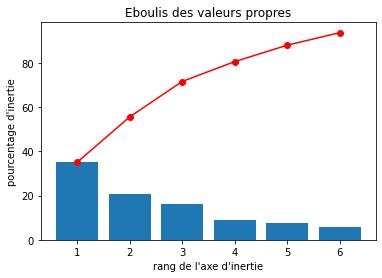

array([2.85764194, 1.6690531 , 1.30425291, 0.73218169, 0.60492298,
       0.46079676])

In [26]:
# Eboulis des valeurs propres
display_scree_plot(pca)
pca.explained_variance_

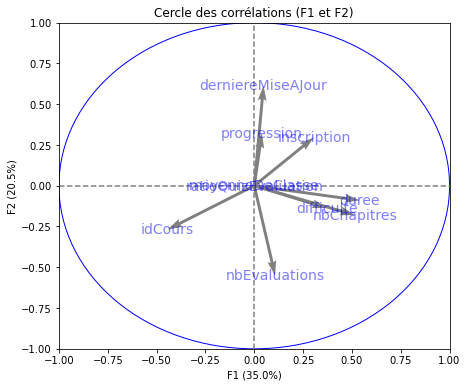

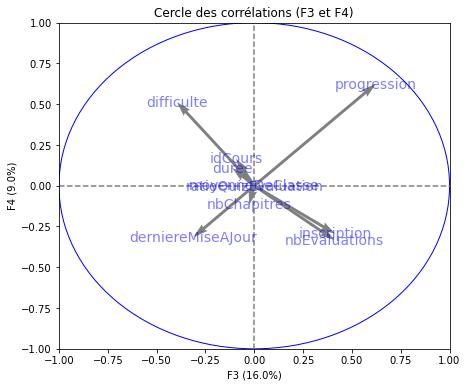

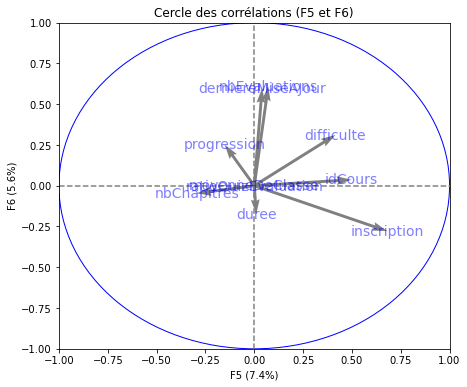

In [24]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

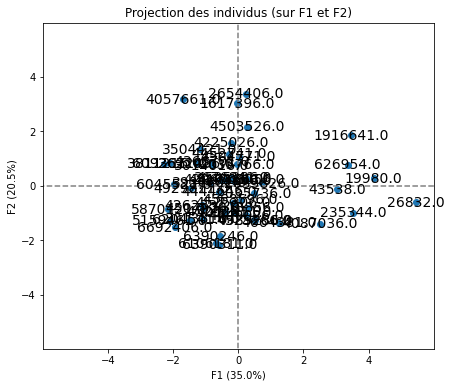

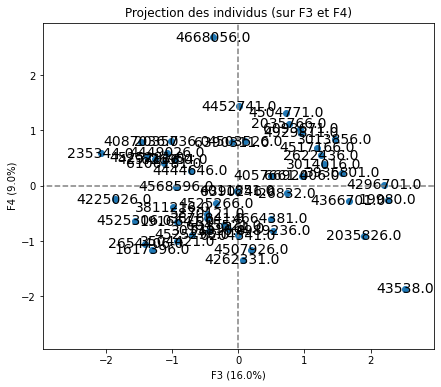

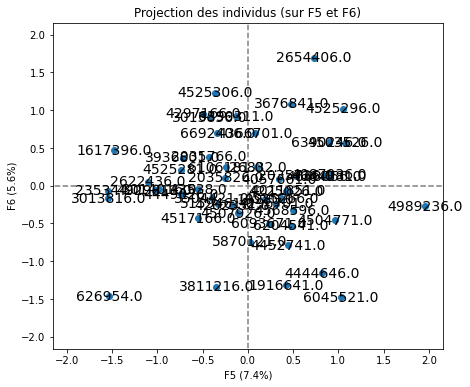

In [25]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()